# SOMS Eddy Properties
Eddy properties from detection file <br>
Make probability distributions for amp, radius <br>
Spatial map with lat/lon


In [1]:
import sys
import numpy as np
import scipy as sp
import netCDF4 as nc4
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pandas as pd
#from glob import glob
import glob

import numpy.linalg as linalg
import scipy.signal as signal
import scipy.ndimage as ndimage
import scipy.interpolate as interpolate

from netCDF4 import Dataset

from itertools import repeat

# import sys
# sys.path.insert(0, '/home/tsmith/scratch/eddyTracking/ecjoliver/')
# import params 

import re

from scipy.io.netcdf import netcdf_file as netcdf
import cmocean.cm as cmo
import warnings
import matplotlib.colors as colors
from cartopy import crs as ccrs, feature as cfeature

# import copy
# sys.path.insert(0, '/home/tsmith/scratch/SOMS_equal/')
# from SOMS_code import *
# from RegridderPLUS import *

In [2]:
%matplotlib inline

In [3]:
def find_ind(grid1d, coord):
        a=abs(grid1d-coord)
        return np.where(a==np.min(a))[0][0]

## Import Eddies pd

In [26]:
eddy_dfA2 = pd.read_pickle("../eddy_dataframe_Anticyclonic.pkl")
eddy_dfC2 = pd.read_pickle("../eddy_dataframe_Cyclonic.pkl")

In [27]:
grid_CYC = xr.open_mfdataset('../SOMS_Dataset_Cyclonic.nc')
grid_ACYC = xr.open_mfdataset('../SOMS_Dataset_Anticyclonic.nc')


In [28]:
freqC = grid_CYC['Node_frequency']
freqA = grid_ACYC['Node_frequency']

## Figure S3: Plot Radius and Amplitude Distribution

In [29]:
xdim=3
ydim=3
n=xdim*ydim

In [30]:
import scipy.stats as stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [31]:
#05/07 changed amplitude from m to cm

Text(0.5, 0.44, '(d)')

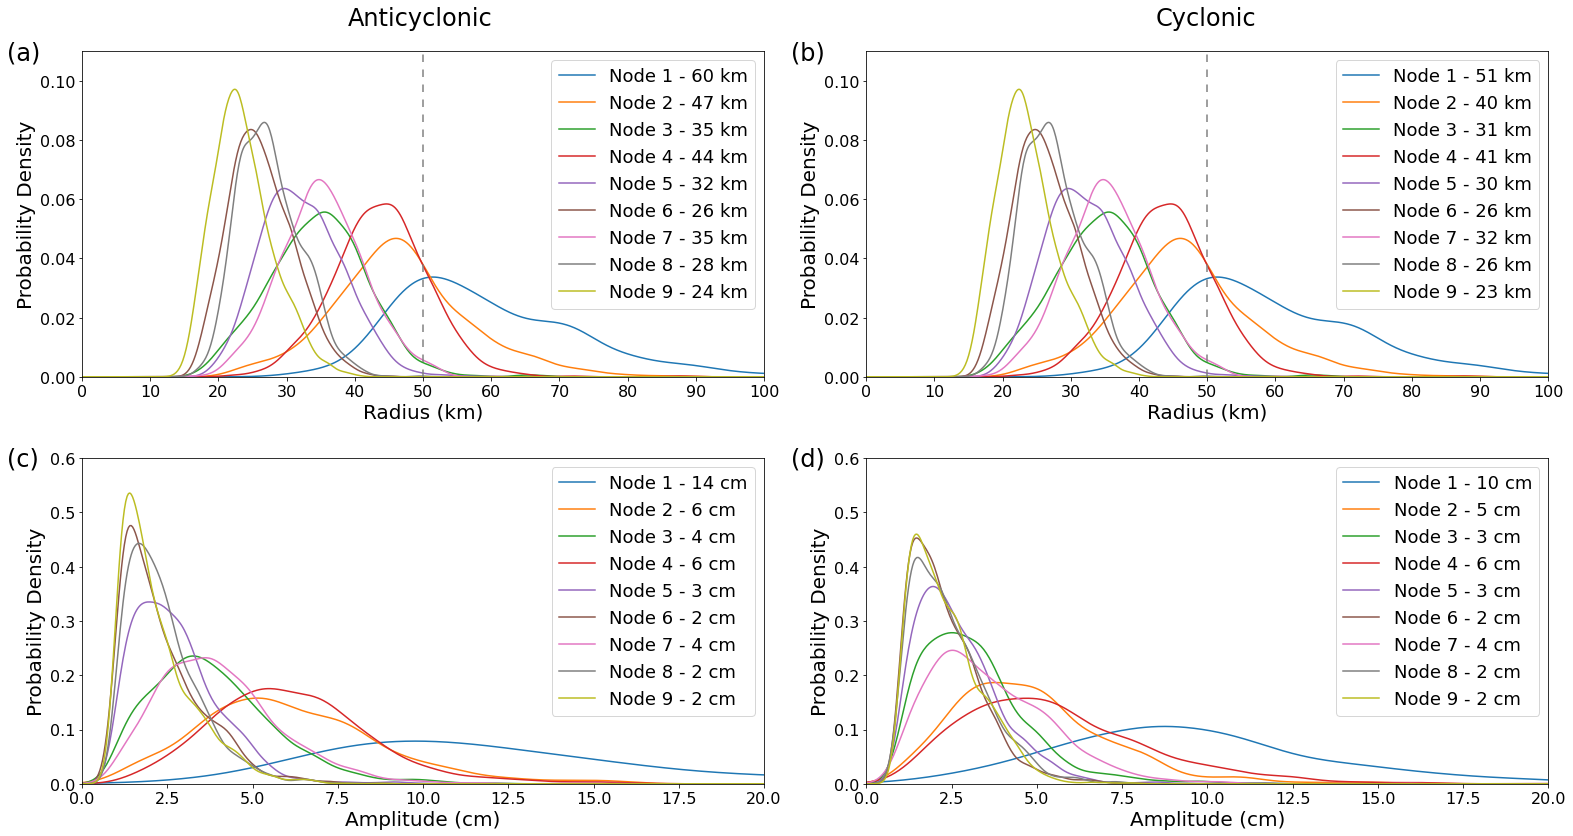

In [32]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(22,12),nrows = 2, ncols = 2)
                       #, subplot_kw={'projection': proj})

#xgrid = [-180, -120, -60, 0, 60, 120, 180]
#ygrid = [-90, -60, -30, 0, 30, 60, 90]

ax=ax.reshape(-1)

for k in range(n):
    #anticyclonic radius first
    #kde = stats.gaussian_kde(eddies_array_listA[k][:,2])
    kde = stats.gaussian_kde(eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'Radius'].values)
    xx = np.linspace(0,125,1000)
    #ax[0].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f km" %round(eddies_array_meanA[k][2]))
    ax[0].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f km" 
               %round((eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'Radius'].values).mean()))
    #kde1 = stats.gaussian_kde(eddies_array_listC[k][:,2])
    kde1 = stats.gaussian_kde(eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'Radius'].values)
    #ax[1].plot(xx,kde1(xx),label="Node %i" %(k+1) +" - %.0f km" %round(eddies_array_meanC[k][2]))
    ax[1].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f km" 
               %round((eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'Radius'].values).mean()))
#     ax.hist(eddies_array_listA[k][:,2],label="Node %i" %(k+1)
#             ,density=True,bins=20)
    
            #,color='tab:blue')
    #ax[k].set_ylim(0,250)                       
    #ax[k].set_title("Node %i" %(k+1) + ", freq %i"  %percA[k] +'%' )
for i in range(2):    
    ax[i].set_xlim(0,100)
    ax[i].set_ylim(0,0.11)

        #format axis

    ax[i].xaxis.set_major_locator(MultipleLocator(10))
    ax[i].legend(fontsize=18)
    ax[i].set_xlabel("Radius (km)",fontsize=20) 
    ax[i].set_ylabel('Probability Density',fontsize=20) 
    ax[i].axvline(x=50,color='grey',linestyle='--',dashes=(5, 5))

#AMPLITUDE
for k in range(n):
    #kde = stats.gaussian_kde(eddies_array_listA[k][:,3]*100)
    kde = stats.gaussian_kde((eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'Amplitude'].values*100))
    xx = np.linspace(0,40,1000)
    #ax[2].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f cm" %round(eddies_array_meanA[k][3]*100))
    ax[2].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f cm" 
               %round((eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'Amplitude'].values).mean()*100))
    #kde1 = stats.gaussian_kde(eddies_array_listC[k][:,3]*100)
    kde = stats.gaussian_kde((eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'Amplitude'].values*100))
    #ax[3].plot(xx,kde1(xx),label="Node %i" %(k+1) +" - %.0f cm" %round(eddies_array_meanC[k][3]*100))
    ax[3].plot(xx,kde(xx),label="Node %i" %(k+1) +" - %.0f cm" 
               %round((eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'Amplitude'].values).mean()*100))
#     ax.hist(eddies_array_listA[k][:,2],label="Node %i" %(k+1)
#             ,density=True,bins=20)
    
            #,color='tab:blue')
    #ax[k].set_ylim(0,250)                       
    #ax[k].set_title("Node %i" %(k+1) + ", freq %i"  %percA[k] +'%' )
for i in range(2,4):
    ax[i].set_xlim(0,20)
    ax[i].set_ylim(0,0.6)

    #ax.xaxis.set_major_locator(MultipleLocator(25))
    #ax.legend()
    #ax[i].set_title('Distribution of Eddy Amplitude ANTICYCLONIC')
    ax[i].set_xlabel('Amplitude (cm)',fontsize=20)
    ax[i].set_ylabel('Probability Density',fontsize=20)
    ax[i].legend(fontsize=18)
    

#plot text for average diameter
# ax[k].text(0.8, 0.9, u"\u2300" + " = %.0f" %eddies_array_meanA[k][2] + " km", horizontalalignment='center', verticalalignment='center'
#             ,transform=ax[k].transAxes)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)
fig.tight_layout()
plt.subplots_adjust(top=0.92)
plt.subplots_adjust(hspace=0.25)
plt.subplots_adjust(wspace=0.15)
# Add labels
fig.text(0.005, 0.91, '(a)', fontsize=24, fontweight='normal')
fig.text(0.22, 0.95, 'Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.5, 0.91, '(b)', fontsize=24, fontweight='normal')
fig.text(0.73, 0.95, 'Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.005, 0.44, '(c)', fontsize=24, fontweight='normal')
fig.text(0.5, 0.44, '(d)', fontsize=24, fontweight='normal')

# Anticyclonic
# Cyclonic
#fig.suptitle('Distribution of Eddy Radius ANTICYCLONIC')

#plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_rad_amp_Figure4_NEW.png', dpi=500)


# Lat lon matrix

In [33]:
#pcolormesh plots on edge grid
#need to find closest to middle value
#eg 59 contains anything from 60 to 58
#but then plot on 60

In [34]:
# lat2 = np.arange(-59.5,-36.5,2)
# lon2 = np.arange(-10.5,15.5,2)

In [35]:
lat2 = np.arange(-59,-36,2)
lon2 = np.arange(-10,15,2)

In [36]:
space_arrayA2 = np.zeros((n,len(lat2),len(lon2)))
for i in range(n):
    lat_values = eddy_dfA2.loc[eddy_dfA2['Node'] == (i+1), 'Lat'].values
    lon_values = eddy_dfA2.loc[eddy_dfA2['Node'] == (i+1), 'Lon'].values
    
    for j, k in zip(lat_values,lon_values):
        lat_idx = find_ind(lat2,j)
        lon_idx = find_ind(lon2,k)
        
        space_arrayA2[i,lat_idx,lon_idx] += 1

In [37]:
space_arrayC2 = np.zeros((n,len(lat2),len(lon2)))
for i in range(n):
    lat_values = eddy_dfC2.loc[eddy_dfC2['Node'] == (i+1), 'Lat'].values
    lon_values = eddy_dfC2.loc[eddy_dfC2['Node'] == (i+1), 'Lon'].values
    
    for j, k in zip(lat_values,lon_values):
        lat_idx = find_ind(lat2,j)
        lon_idx = find_ind(lon2,k)
        
        space_arrayC2[i,lat_idx,lon_idx] += 1

In [38]:
#get percentage of each node

In [39]:
freqA = freqA.values
freqC = freqC.values

In [40]:
space_array_percA2 = np.zeros(shape=(9,12,13))
for i in range(9):
    space_array_percA2[i] = space_arrayA2[i]/freqA[i]*100
    

In [41]:
space_array_percC2 = np.zeros(shape=(9,12,13))
for i in range(9):
    space_array_percC2[i] = space_arrayC2[i]/freqC[i]*100

In [42]:
percC = np.array(freqC)/sum(freqC)*100
percA = np.array(freqA)/sum(freqA)*100

In [43]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

## Figure S4: Spatial Maps

### Add fronts

In [44]:
#GET FRONTS
fronts = xr.open_mfdataset('../BIOPERIANT12-CNCLNG01_Fronts.nc', decode_times=False)

#already -180 to 180
fronts_lon = fronts['lon']

#annual mean
stf = fronts['stf'].mean('time_counter')
saf = fronts['saf'].mean('time_counter')
pf = fronts['pf'].mean('time_counter')
ice = fronts['iceedge'].mean('time_counter')

In [45]:
k1 = find_ind(fronts_lon,-11)
k2 = find_ind(fronts_lon,15)

Text(0.67, 0.03, 'Longitude (°)')

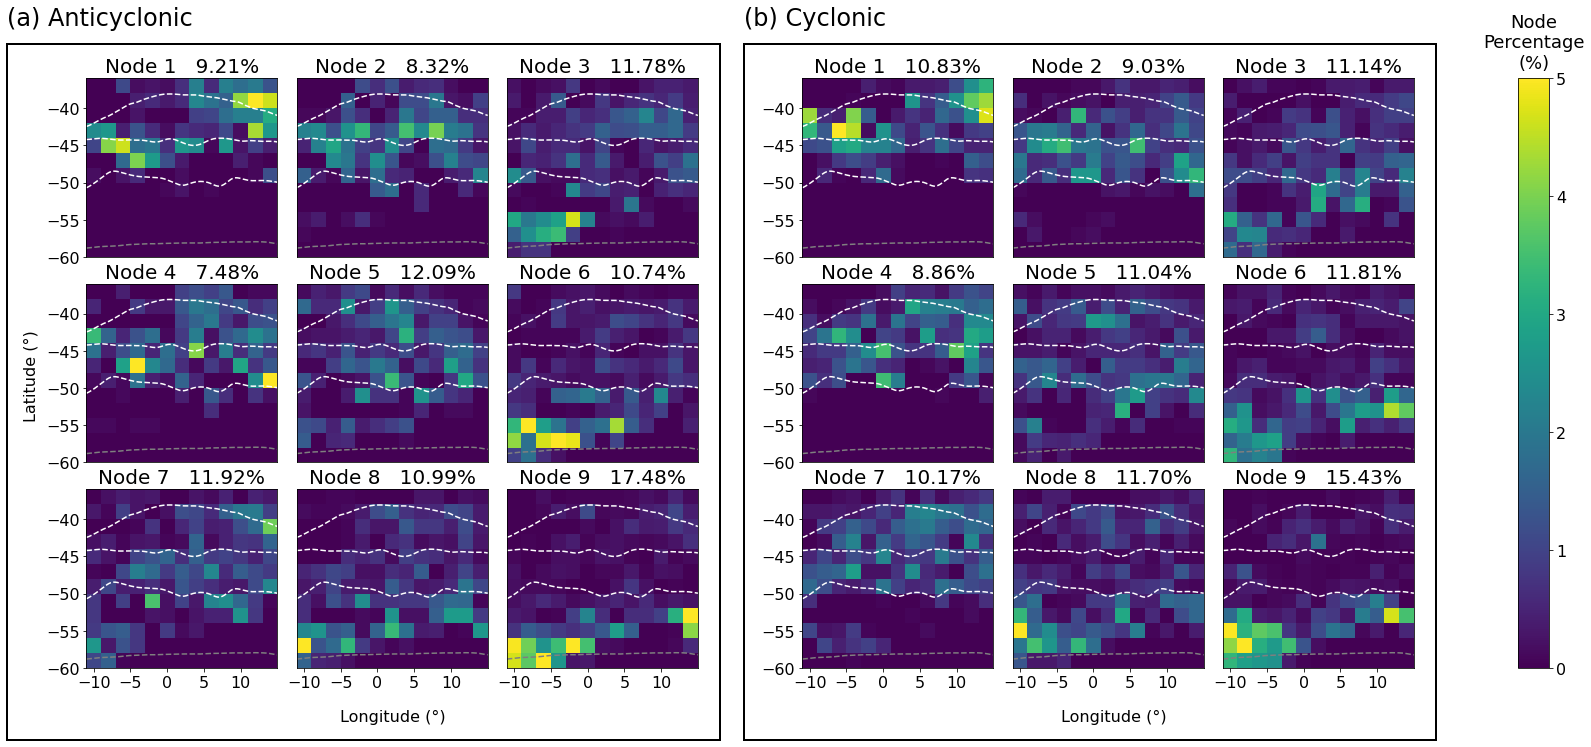

In [46]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.15)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lon2, lat2,  
                            space_array_percA2[k]
                            ,vmin = 0, vmax= 5
                            #,levels=levels)
                           ,shading='auto')
    #FRONTS
    ax.plot(fronts_lon[k1:k2+1],stf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],saf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],pf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],ice[k1:k2+1], linestyle='--',color='tab:grey')
    
#     ax.set_aspect('equal', adjustable='box')
    ax.set_yticks([-60,-55,-50,-45,-40] if col == 0 else [])
    ax.set_xticks([-10,-5,0,5,10]  if row == 2 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    ax.set_title("Node %i   %.2f%%" % (k+1, percA[k]),fontsize=20)
    #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(SOMS_RV_arrayA[k,0,:,:].max(('y','x')))))
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.45, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.15)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    mesh = ax.pcolormesh(lon2, lat2,  
                            space_array_percC2[k]
                            ,vmin = 0, vmax= 5
                            #,levels=levels)
                           ,shading='auto')
    #ax.set_aspect('equal', adjustable='box
    #FRONTS
    ax.plot(fronts_lon[k1:k2+1],stf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],saf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],pf[k1:k2+1], linestyle='--',color='w')
    ax.plot(fronts_lon[k1:k2+1],ice[k1:k2+1], linestyle='--',color='tab:grey')
    
    ax.set_yticks([-60,-55,-50,-45,-40] if col == 0 else [])
    ax.set_xticks([-10,-5,0,5,10]  if row == 2 else [])
    ax.set_title("Node %i   %.2f%%" % (k+1, percC[k]),fontsize=20)

    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.47, 0.005), 0.437, 0.92, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Add colorbar
cbar_ax = fig.add_subplot(outer_grid[2])
cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
                    #label='Temp anomaly °C',
                    shrink=1,aspect=20)
cbar.set_ticks([0,1,2,3,4,5])
cbar.ax.tick_params(labelsize=16)
cbar_ax.set_title('Node\nPercentage\n(%)',pad=10,fontsize=18)
#cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.055)
plt.subplots_adjust(top=0.88)
plt.subplots_adjust(bottom=0.1)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.47, 0.95, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.015,0.43, 'Latitude (°)',rotation='vertical',fontsize=16)
fig.text(0.215,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)
fig.text(0.67,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)


In [47]:
#cartopy

In [48]:
# #with cartopy
# proj = ccrs.PlateCarree()
# fig, ax = plt.subplots(figsize=(16,8),nrows = 4, ncols = 3, subplot_kw={'projection': proj})

In [49]:
# plt.rcParams.update({'font.size': 16})

# proj = ccrs.PlateCarree()

# fig = plt.figure(figsize=(22, 9),facecolor='w')
# outer_grid = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# angle = np.linspace(0,2*np.pi,150)

# # First grid
# i = 0
# inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0)
# for k in range(9):
#     row, col = divmod(k, 3)
#     ax = fig.add_subplot(inner_grid[row, col],projection=proj)
#     mesh = ax.pcolormesh(lon2, lat2,  
#                             space_array_percA[k]
#                             ,vmin = 0, vmax= 5
#                             #,levels=levels)
#                            ,shading='auto')
#     ax.set_extent([-11, 15, -60, -37], proj)
# #     ax.set_aspect('equal', adjustable='box')
#     ax.set_yticks([-60,-55,-50,-45,-40] if col == 0 else [])
#     ax.set_xticks([-10,-5,0,5,10]  if row == 2 else [])
#     #can specify left or right justification but easier to just add spaces inbetween
#     ax.set_title("Node %i   %.2f%%" % (k+1, percA[k]),fontsize=20)
#     #ax.set_title("Node {:<2d}{:>10.2f}°C".format(k+1, float(SOMS_RV_arrayA[k,0,:,:].max(('y','x')))))
    
#     fig.add_subplot(ax)

# # Draw black box around the subplots in the first grid
# rect = Rectangle((0.005, 0.005), 0.415, 0.96, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
# fig.add_artist(rect)

# # Second grid
# i = 1
# inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0)
# for k in range(9):
#     row, col = divmod(k, 3)
#     ax = fig.add_subplot(inner_grid[row, col],projection=proj)
#     mesh = ax.pcolormesh(lon2, lat2,  
#                             space_array_percC[k]
#                             ,vmin = 0, vmax= 5
#                             #,levels=levels)
#                            ,shading='auto')
#     #ax.set_aspect('equal', adjustable='box')
#     ax.set_extent([-11, 15, -60, -37], proj)
#     ax.set_yticks([-60,-55,-50,-45,-40] if col == 0 else [])
#     ax.set_xticks([-10,-5,0,5,10]  if row == 2 else [])
#     ax.set_title("Node %i   %.2f%%" % (k+1, percC[k]),fontsize=20)

#     fig.add_subplot(ax)

# # Draw black box around the subplots in the second grid
# rect = Rectangle((0.44, 0.005), 0.395, 0.96, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
# fig.add_artist(rect)

# # Add colorbar

# cbar_ax = fig.add_axes([0.88, 0.095, 0.02, 0.82],outer_grid[2])
# cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical')

# # cbar_ax = fig.add_subplot(outer_grid[2])
# # cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
# #                     #label='Temp anomaly °C',
# #                     shrink=0.1,aspect=20)

# cbar.set_ticks([0,1,2,3,4,5])
# cbar.ax.tick_params(labelsize=16)
# cbar_ax.set_title('Node\nPercentage (%)',pad=20,fontsize=16)
# #cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# # Adjust layout
# #fig.tight_layout()
# plt.subplots_adjust(wspace=0.25)
# plt.subplots_adjust(left=0.055)
# plt.subplots_adjust(top=0.94)
# plt.subplots_adjust(bottom=0.07)

# # #plt.subplots_adjust(wspace=0.25)
# # #plt.subplots_adjust(right=0.85)
# # # plt.subplots_adjust(top=0.85)
# #plt.subplots_adjust(left=0.1)

# #cbar_ax.set_position([0.5,0.5,0.5,0.9])

# #plt.subplots_adjust(right=0.85)

# # Add labels
# fig.text(0.005, 0.99, '(a) Anticyclonic', fontsize=24, fontweight='normal')
# fig.text(0.44, 0.99, '(b) Cyclonic', fontsize=24, fontweight='normal')
# fig.text(0.015,0.43, 'Latitude (°)',rotation='vertical',fontsize=16)
# fig.text(0.2,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)
# fig.text(0.62,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)


# #plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_Location_Figure5_cartopy.png', dpi=500)

## Amplitude vs MLD max/min

In [50]:
ampA = eddy_dfA2['Amplitude'].values
MLD_maxA = eddy_dfA2['MLD_anom_max'].values

ampC = eddy_dfC2['Amplitude'].values
MLD_minC = eddy_dfC2['MLD_anom_min'].values

In [51]:
MLD_maxA_xr = xr.DataArray(MLD_maxA, dims=['eddy_count'])
ampA_xr = xr.DataArray(ampA, dims=['eddy_count'])

MLD_minC_xr = xr.DataArray(MLD_minC, dims=['eddy_count'])
ampC_xr = xr.DataArray(ampC, dims=['eddy_count'])


In [52]:
from scipy.stats import pearsonr

corrA, p_valueA = pearsonr(ampA, MLD_maxA)
corrC, p_valueC = pearsonr(-ampC, MLD_minC)

In [53]:
# b, a = np.polyfit(ampA, MLD_maxA[:], deg=1)
# # Create sequence of 100 numbers from 0 to 100 
# xseq = np.linspace(0, 0.5, num=100)

# d, c = np.polyfit(-ampC, MLD_minC[:], deg=1)
# # Create sequence of 100 numbers from 0 to 100 
# xseq1 = np.linspace(-0.5, 0, num=100)

In [54]:
bins = np.linspace(0, 0.5, num=10)

bins_center = (bins[:-1]+bins[1:])/2
 

groupA = MLD_maxA_xr.groupby_bins(ampA_xr, bins).mean()

stdA = MLD_maxA_xr.groupby_bins(ampA_xr,bins).std()

groupC = MLD_minC_xr.groupby_bins(ampC_xr, bins).mean()

stdC = MLD_minC_xr.groupby_bins(ampC_xr,bins).std()


### Correlation values

In [55]:
corrA_nodes = np.empty(9)
corrC_nodes = np.empty(9)

pA_nodes = np.empty(9)
pC_nodes = np.empty(9)

for i in range(9):
    corrA_nodes[i],pA_nodes[i] = pearsonr(eddy_dfA2.loc[eddy_dfA2['Node'] == (i+1), 'Amplitude'].values,
                                         eddy_dfA2.loc[eddy_dfA2['Node'] == (i+1), 'MLD_anom_max'].values)
    
    corrC_nodes[i],pC_nodes[i] = pearsonr(-(eddy_dfC2.loc[eddy_dfC2['Node'] == (i+1), 'Amplitude'].values),
                                          eddy_dfC2.loc[eddy_dfC2['Node'] == (i+1), 'MLD_anom_min'].values)

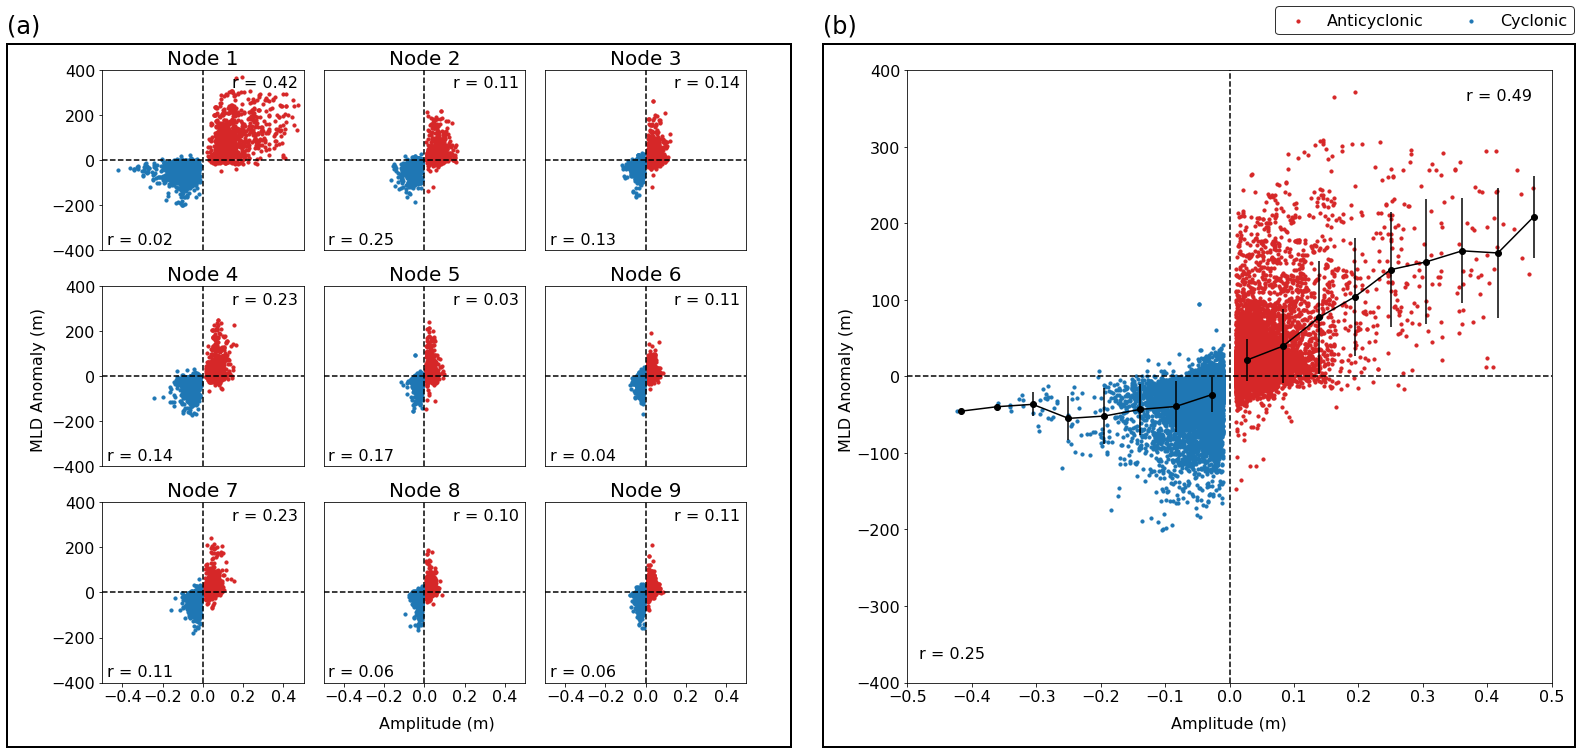

In [56]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 2, width_ratios=[1, 1])

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
for k in range(9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    
    ax.scatter(eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'Amplitude'].values,
               eddy_dfA2.loc[eddy_dfA2['Node'] == (k+1), 'MLD_anom_max'].values,
               color='tab:red',label='Anticyclonic',s=10)
    ax.scatter(-(eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'Amplitude'].values),
               eddy_dfC2.loc[eddy_dfC2['Node'] == (k+1), 'MLD_anom_min'].values,
               color='tab:blue',label='Cyclonic',s=10)

    ax.set_title("Node %i" %(k+1),fontsize=20 )
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-400,400)
    ax.axhline(y=0,linestyle='--',color='k')
    ax.axvline(x=0,linestyle='--',color='k')
    ax.text(0.97, 0.97, 'r = %.2f' %corrA_nodes[k], transform=ax.transAxes, ha='right', va='top')
    ax.text(0.35, 0.1, 'r = %.2f' %corrC_nodes[k], transform=ax.transAxes, ha='right', va='top')
    
    ax.set_yticks([-400,-200,0,200,400] if col == 0 else [])
    ax.set_xticks([-0.4,-0.2,0,0.2,0.4]  if row == 2 else [])
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the first grid
# rect = Rectangle((0.005, 0.005), 0.48, 0.9, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
# fig.add_artist(rect)

rect = Rectangle((0.005, 0.005), 0.495, 0.93, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(1, 1, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
ax = fig.add_subplot(inner_grid[0, 0])

#fig, ax = plt.subplots(figsize=(8,5),nrows = 1, ncols = 1)
                       #, subplot_kw={'projection': proj})

ax.scatter(ampA,MLD_maxA,color='tab:red',label='Anticyclonic',s=10)
ax.scatter(-ampC,MLD_minC,color='tab:blue',label='Cyclonic',s=10)
ax.axhline(y=0,linestyle='--',color='k')
ax.axvline(x=0,linestyle='--',color='k')

ax.plot(bins_center,groupA,color='k')
ax.errorbar(bins_center,groupA,yerr = stdA,fmt='o',color='k')
ax.plot(-bins_center,groupC,color='k')
ax.errorbar(-bins_center,groupC,yerr=stdC,fmt='o',color='k')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-400,400)

#ax.set_yticks([-400,-200,0,200,400]
ax.set_xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
    
    #format axis
    
#ax.yaxis.set_major_locator(MultipleLocator(0.1))
#ax.legend(loc=2)
# ax.set_xlabel("Amplitude (m)")   
# ax.set_ylabel("MLD Anomaly (m)")
ax.text(0.97, 0.97, 'r = %.2f' %corrA, transform=ax.transAxes, ha='right', va='top')
ax.text(0.12, 0.06, 'r = %.2f' %corrC, transform=ax.transAxes, ha='right', va='top')

#     ax = fig.add_subplot(inner_grid[row, col])

    
#     fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
# rect = Rectangle((0.52, 0.005), 0.475, 0.9, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
# fig.add_artist(rect)

rect = Rectangle((0.52, 0.005), 0.475, 0.93, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# # Add colorbar
# cbar_ax = fig.add_subplot(outer_grid[2])
# cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
#                     #label='Temp anomaly °C',
#                     shrink=1,aspect=20)
# cbar.set_ticks([0,1,2,3,4,5])
# cbar.ax.tick_params(labelsize=16)
# cbar_ax.set_title('Node\nPercentage\n(%)',pad=10,fontsize=18)
# #cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
# plt.subplots_adjust(wspace=0.25)
# plt.subplots_adjust(left=0.06)
# plt.subplots_adjust(right=0.95)
# plt.subplots_adjust(top=0.85)

plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(top=0.9)
plt.subplots_adjust(left=0.065)
plt.subplots_adjust(right=0.98)
plt.subplots_adjust(bottom=0.09)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.95, '(a)', fontsize=24, fontweight='normal')
fig.text(0.52, 0.95, '(b)', fontsize=24, fontweight='normal')
fig.text(0.02,0.4, 'MLD Anomaly (m)',rotation='vertical',fontsize=16)
fig.text(0.53,0.4, 'MLD Anomaly (m)',rotation='vertical',fontsize=16)

fig.text(0.24, 0.03, 'Amplitude (m)', fontsize=16, fontweight='normal')
fig.text(0.74, 0.03, 'Amplitude (m)', fontsize=16, fontweight='normal')

#fig.text(0.98,0.35, 'FCO2 (mmolC/m\u00B2/day)',rotation='vertical',fontsize=16)
# fig.text(0.215,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)
# fig.text(0.67,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)

handles, labels = ax.get_legend_handles_labels()
# handles1, labels1 = ax1.get_legend_handles_labels()
# handles += handles1
# labels += labels1
fig.legend(handles, labels,loc='upper right', bbox_to_anchor=(0.999, 0.995),ncol=3,fontsize=16,edgecolor='k')

# frame = legend.get_frame()
# frame.set_edgecolor('k')

#plt.savefig('/home/tsmith/scratch/images/Paper1/SOMS_MLD_amp_S.png', dpi=500)